In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df_train = pd.read_csv("C:/Users/heera/OneDrive - Heerak/Desktop/framingham.csv")
df_train.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

# Check for Null values

In [3]:
df_train.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Imputer

In [4]:
from sklearn.impute import SimpleImputer as Imputer
mean_imputer = Imputer(strategy='mean')
mode_imputer = Imputer(strategy='most_frequent')

In [5]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=2)

# Replacing null values in "glucose" using mean imputer and dropping Education column

In [6]:
mean_imputer.fit(df_train[['glucose']])
df_train['glucose'] = mean_imputer.transform(df_train[['glucose']])
df_train.drop(['education'],axis=1,inplace=True)
df_train.head(3)
df_train.shape

(4240, 15)

# Dropping remaining Null values as it is only 3% of dataset

In [7]:
df_train.dropna(inplace=True)
df_train.shape

(4090, 15)

# Plotting Histogram to check which columns are imbalanced

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2CB05A588>,
      dtype=object)

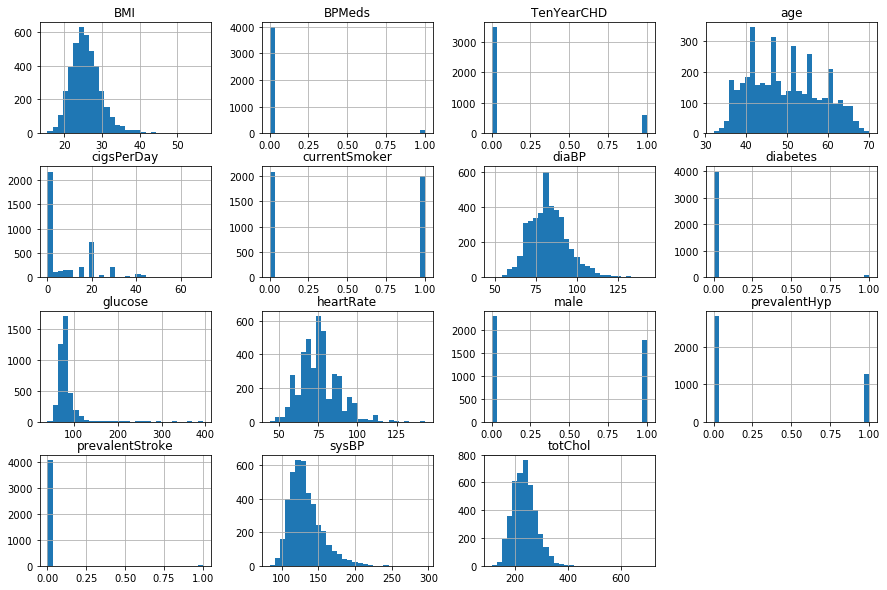

In [8]:
df_train.hist(bins=30, figsize=(15, 10))

# Value Counts of "y column: "TenYearCHD"

In [9]:
dat = df_train["TenYearCHD"].value_counts()
print(dat)

0    3479
1     611
Name: TenYearCHD, dtype: int64


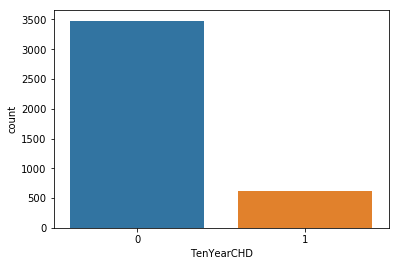

There are 3479 patients without heart disease and 611 patients with the disease


In [10]:
sns.countplot(x='TenYearCHD',data=df_train)
plt.show()
print("There are 3479 patients without heart disease and 611 patients with the disease")

In [11]:
df_train['glucose']

0        77.000000
1        76.000000
2        70.000000
3       103.000000
4        85.000000
           ...    
4234     68.000000
4236     81.963655
4237    107.000000
4238     72.000000
4239     80.000000
Name: glucose, Length: 4090, dtype: float64

# Heatmap to check corelation

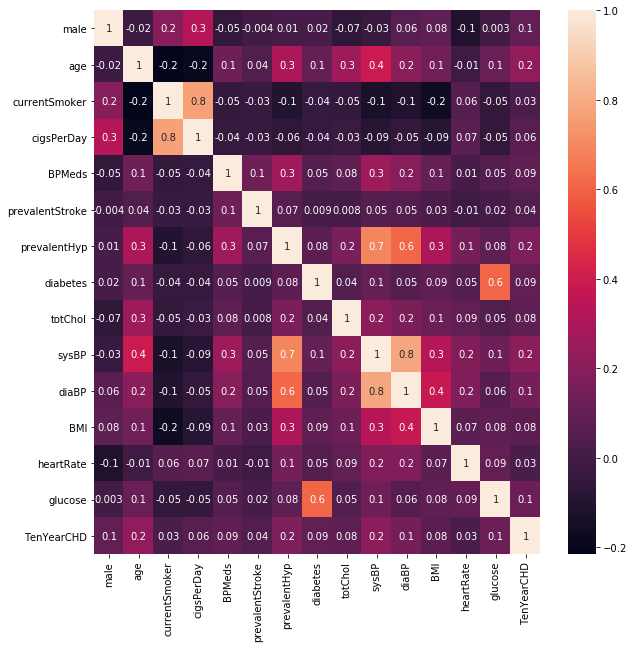

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_train.corr(), annot = True, fmt='.1g')

# Feature selection using Boruta
Referred: https://towardsdatascience.com/simple-example-using-boruta-feature-selection-in-python-8b96925d5d7a

In [13]:

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [14]:
#define the features
X = df_train.iloc[:,:-1].values
y = df_train["TenYearCHD"].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2,random_state=1)
 
# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=24, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1F2CB0337B8),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1F2CB0337B8, verbose=2)

In [15]:
# check selected features
feat_selector.support_



array([False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False])

In [16]:
# check ranking of features
feat_selector.ranking_


array([ 9,  1, 10,  7, 12, 13,  8, 11,  3,  1,  4,  2,  6,  5])

# Most Important features 

In [17]:
df_train.columns[:-1][feat_selector.support_].to_list()

['age', 'sysBP']

In [18]:
data = df_train.columns[:-1][feat_selector.ranking_ <=7].tolist()
data

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [19]:
X = df_train[data]
y = df_train["TenYearCHD"]

# Over sampling for imbalanced dataset


In [20]:
from imblearn.over_sampling import SMOTE


In [21]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [22]:
sm = SMOTE(random_state=40)
X_sm, y_sm = sm.fit_resample(X, y)

# oversample = RandomOverSampler(sampling_strategy='minority')
# X_over, y_over = oversample.fit_resample(X, y)


# Classification models

# Decision tree

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import classification_report

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.3,random_state =6)
# X_train, X_test, y_train, y_test = train_test_split(X_over, y_over,test_size=0.3,random_state =6)

In [25]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Decision Tree")
print('---------------------')
print(classification_report(y_test, y_pred))

Decision Tree
---------------------
              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1031
           1       0.75      0.80      0.78      1057

    accuracy                           0.77      2088
   macro avg       0.77      0.77      0.77      2088
weighted avg       0.77      0.77      0.77      2088



# Linear SVC

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn import svm
from sklearn.svm import SVC  
model = SVC(kernel='linear', gamma = 6, random_state=0)   # SVC Model
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print('LinearSVC')
print('---------------------')
print(classification_report(y_test, y_pred))
print('')


LinearSVC
---------------------
              precision    recall  f1-score   support

           0       0.65      0.60      0.62      1031
           1       0.64      0.68      0.66      1057

    accuracy                           0.64      2088
   macro avg       0.64      0.64      0.64      2088
weighted avg       0.64      0.64      0.64      2088




# Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log = log.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = log.predict(X_test)
print("Logistic regression")
print('---------------------')
print(classification_report(y_test, y_pred))

Logistic regression
---------------------
              precision    recall  f1-score   support

           0       0.64      0.63      0.64      1031
           1       0.65      0.66      0.65      1057

    accuracy                           0.64      2088
   macro avg       0.64      0.64      0.64      2088
weighted avg       0.64      0.64      0.64      2088



# SVM

In [28]:
from sklearn import svm
from sklearn.svm import SVC  
model = SVC(kernel='rbf', random_state=0)   # SVC Model
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print('SVM')
print('---------------------')
print(classification_report(y_test, y_pred))
print('')


SVM
---------------------
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      1031
           1       0.64      0.70      0.67      1057

    accuracy                           0.65      2088
   macro avg       0.65      0.65      0.65      2088
weighted avg       0.65      0.65      0.65      2088




# Hyper parameter tuning for SVM ,linearSVC

In [29]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0,0.01,0.1,0.8,1,1.2,10], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf'] } 
  
grid = GridSearchCV(svm.SVC(random_state=0), param_grid,verbose=1,n_jobs=-1,cv=10)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  1.3min finished


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01, random_state=0)
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1031
           1       0.94      0.93      0.93      1057

    accuracy                           0.93      2088
   macro avg       0.93      0.93      0.93      2088
weighted avg       0.93      0.93      0.93      2088



# Hyper parameter tuning logistic regression

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
parameter = {"penalty":["l1","l2"],
            "C":[0,0.01,0.1,0.8,1,1.2],
            "max_iter":[150,300,500,1000]}
random = RandomizedSearchCV(logistic,param_distributions=parameter, random_state=0,verbose=1,n_jobs=-1)
random.fit(X_train,y_train)
random_predictions = random.predict(X_test)
print(classification_report(y_test, random_predictions))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


              precision    recall  f1-score   support

           0       0.64      0.63      0.64      1031
           1       0.65      0.65      0.65      1057

    accuracy                           0.64      2088
   macro avg       0.64      0.64      0.64      2088
weighted avg       0.64      0.64      0.64      2088



# Hyper parameter tuning Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
parameters = {"n_estimators":[10,100],
              'criterion':['gini','entropy'],
             'max_depth':[20,60,'None','sqrt'],
             'bootstrap':['True','False']}
random = RandomizedSearchCV(estimator=rf,param_distributions=parameters,verbose=1,n_jobs=-1)
random.fit(X_train,y_train)
random.best_params_,random.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.4s finished


({'n_estimators': 100,
  'max_depth': 60,
  'criterion': 'entropy',
  'bootstrap': 'True'},
 0.8529774127310061)

In [46]:
rf = RandomForestClassifier(n_estimators= 90,
 max_depth= 60,
 criterion= 'gini',
 bootstrap= False)
rf.fit(X_train,y_train)
y_predrf = rf.predict(X_test)
print(classification_report(y_test,y_predrf))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1031
           1       0.88      0.90      0.89      1057

    accuracy                           0.89      2088
   macro avg       0.89      0.89      0.89      2088
weighted avg       0.89      0.89      0.89      2088

